# Classificação de imagens do dataset MNIST com CNN


## A Operação de Convolução
![title](img/convolution.gif)


## Redes Neurais Convolucionais (Convolutional Neural Networks - CNN)

![title](img/cnn.png)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
#tf.compat.v1.disable_v2_behavior()


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


6


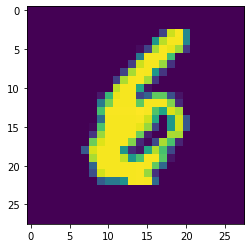

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Funciona somente se utilizar iPython
i = 129 # 0-59.999
print(y_train[i])
plt.imshow(x_train[i])

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping o array para 4D a fim de poder trabalhar com a API Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Converte para float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizando os valores RGB das imagens, pelo valor máximo de um RGB
x_train /= 255
x_test /= 255

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.5)

print('Shape de x_train', x_train.shape)
print('Shape de x_val', x_val.shape)
print('Shape de x_test', x_test.shape)

print('Shape de y_train', y_train.shape)
print('Shape de y_val', y_val.shape)
print('Shape de y_test', y_test.shape)

print(y_train[89])

Shape de x_train (30000, 28, 28, 1)
Shape de x_val (30000, 28, 28, 1)
Shape de x_test (10000, 28, 28, 1)
Shape de y_train (30000,)
Shape de y_val (30000,)
Shape de y_test (10000,)
6


In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4043536125691319463
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13941212853161205574
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3227103476869172295
physical_device_desc: "device: XLA_GPU device"
]


In [6]:
# Importando os módulos do Keras necessários: model e layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

# Criando um modelo Sequential e adicionando as camadas
model = Sequential()
model.add(Conv2D(28, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(14, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten()) # Tornando os arrays 2D para flatten (achatado, 1D) para utilização de camadas totalmente conectadas
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2)) # utiliza o dropout para melhorar o processo de treinamento e evitar under/overfitting
model.add(Dense(10,activation=tf.nn.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 28)        728       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 28)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 14)          9814      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 14)          0         
_________________________________________________________________
flatten (Flatten)            (None, 14)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               1920      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

Epoch 1/20
938/938 [==============================] - 11s 12ms/step - loss: 0.4529 - accuracy: 0.8614 - val_loss: 0.1765 - val_accuracy: 0.9472
Epoch 2/20
938/938 [==============================] - 11s 12ms/step - loss: 0.1535 - accuracy: 0.9528 - val_loss: 0.1203 - val_accuracy: 0.9642
Epoch 3/20
938/938 [==============================] - 10s 11ms/step - loss: 0.1127 - accuracy: 0.9646 - val_loss: 0.1071 - val_accuracy: 0.9672
Epoch 4/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0903 - accuracy: 0.9725 - val_loss: 0.0939 - val_accuracy: 0.9722
Epoch 5/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0766 - accuracy: 0.9755 - val_loss: 0.0913 - val_accuracy: 0.9728
Epoch 6/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0659 - accuracy: 0.9793 - val_loss: 0.0902 - val_accuracy: 0.9731
Epoch 7/20
938/938 [==============================] - 10s 11ms/step - loss: 0.0562 - accuracy: 0.9823 - val_loss: 0.0937 - val_accuracy:

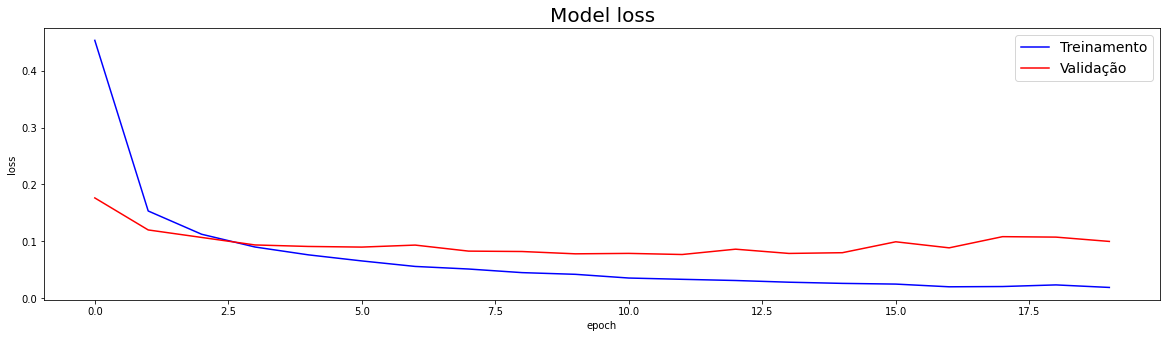

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
epochs = 20
history = model.fit(x=x_train,
                    y=y_train, 
                    epochs=epochs, 
                    verbose=1,
                    validation_data=(x_val, y_val))

# Resumo do historico de loss
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

In [8]:
# 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.07244554162025452
Test accuracy: 0.9825000166893005


4 4


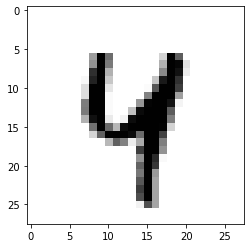

In [9]:
image_index = 42
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax(),y_test[image_index])